![](https://cdn.britannica.com/72/239572-050-F878B4FD/Uber-driver-holds-smartphone-in-car.jpg)

<center> <h1 style="color:white; background-color:black; font-size:50px;" >Uber Data Analysis</h1> </center>

In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
impor
import matplotlib.pyplot as plt
import seaborn as sns

data set link:https://www.kaggle.com/datasets/bhanupratapbiswas/uber-data-analysis

# Data Understanding

<center> <h1 style="color:white; background-color:black; font-size:50px;" >Data Understanding</h1> </center>

In [24]:
df = pd.read_csv('UberDataset.csv')
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
# Let's explore variables, their data types, and total non-null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Cleaning

<center> <h1 style="color:white; background-color:black; font-size:50px;" >Data Cleaning</h1> </center>

In [25]:
# Filling NULL values in feature PURPOSE
df['PURPOSE'] = df['PURPOSE'].fillna("UNKNOWN")

# After this imputation, we are left with 1 NULL value in features - END_DATE, CATEGORY, START, and STOP. We can handle the NULL values by dropping that record
df.dropna(inplace = True)

df.isnull().sum()


START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

# Data Preprocessing

<center> <h1 style="color:white; background-color:black; font-size:50px;" >Data Preprocessing</h1> </center>

In [26]:
# Convert START_DATE and END_DATE to datetime format, handling errors and mixed formats
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce', format='%m/%d/%Y %H:%M')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce', format='%m/%d/%Y %H:%M')

# Check if there are any rows with NaT (null) after conversion
print(df[df['START_DATE'].isnull() | df['END_DATE'].isnull()])

# Continue processing after date conversion
# Create new feature representing the time of the ride - morning, afternoon, evening, night
df['TIME_OF_DAY'] = pd.cut(x = df['START_DATE'].dt.hour, bins=[0, 6, 11, 17, 21, 24], 
                           labels=['Night', 'Morning', 'Afternoon', 'Evening', 'Night'], ordered=False)

# Create new feature representing the month of the ride
month_label = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df['MONTH_OF_THE_RIDE'] = df['START_DATE'].dt.month.map(month_label)

# Create new feature representing day of the ride (week)
day_label = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['DAY_OF_THE_RIDE'] = df['START_DATE'].dt.weekday.map(day_label)

# Duration of the ride in minutes
df['DURATION_OF_THE_RIDE'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60

df.head()



     START_DATE END_DATE  CATEGORY        START             STOP  MILES  \
0           NaT      NaT  Business  Fort Pierce      Fort Pierce    5.1   
1           NaT      NaT  Business  Fort Pierce      Fort Pierce    5.0   
2           NaT      NaT  Business  Fort Pierce      Fort Pierce    4.8   
3           NaT      NaT  Business  Fort Pierce      Fort Pierce    4.7   
4           NaT      NaT  Business  Fort Pierce  West Palm Beach   63.7   
...         ...      ...       ...          ...              ...    ...   
1043        NaT      NaT  Business         Cary             Cary    3.1   
1044        NaT      NaT  Business         Cary             Apex    4.4   
1045        NaT      NaT  Business         Apex             Cary    4.7   
1046        NaT      NaT  Business         Cary      Morrisville    3.0   
1047        NaT      NaT  Business  Morrisville             Cary    3.0   

              PURPOSE  
0      Meal/Entertain  
1             UNKNOWN  
2     Errand/Supplies  
3  

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE,DURATION_OF_THE_RIDE
0,NaT,NaT,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,NaN,NaN,NaN,NaN
1,NaT,NaT,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,NaN,NaN,NaN,NaN
2,NaT,NaT,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,NaN,NaN,NaN,NaN
3,NaT,NaT,Business,Fort Pierce,Fort Pierce,4.7,Meeting,NaN,NaN,NaN,NaN
4,NaT,NaT,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,NaN,NaN,NaN,NaN


# Data Exploration

<center> <h1 style="color:white; background-color:black; font-size:50px;" >Data Exploration</h1> </center>

In [27]:
# summary statistics of the dataset
df.describe()


,START_DATE,END_DATE,MILES,DURATION_OF_THE_RIDE
count,734,735,1155.000000,734.000000
mean,2016-07-25 20:39:53.623978240,2016-07-25 20:40:09.632653056,10.566840,25.483651
min,2016-01-13 13:54:00,2016-01-13 14:07:00,0.500000,0.000000
25%,2016-04-04 00:50:00,2016-04-07 11:39:00,2.900000,10.000000
50%,2016-07-27 23:02:00,2016-07-27 22:26:00,6.000000,17.000000
75%,2016-10-28 15:11:15,2016-10-28 15:47:30,10.400000,29.000000
max,2016-12-31 22:08:00,2016-12-31 23:51:00,310.300000,336.000000
std,NaN,NaN,21.579106,30.844001


In [28]:
print('Min Timestamp in START_TIME is - {}'.format(df['START_DATE'].min()))
print('Max Timestamp in START_TIME is - {}'.format(df['START_DATE'].max()))


Min Timestamp in START_TIME is - 2016-01-13 13:54:00
Max Timestamp in START_TIME is - 2016-12-31 22:08:00


In [29]:
print("Total number of unique categories in CATEGORY - {}".format(df['CATEGORY'].nunique()))
print("Total number of unique categories in PURPOSE - {}".format(df['PURPOSE'].nunique()))
print("Total number of unique location in START - {}".format(df['START'].nunique()))
print("Total number of unique location in STOP - {}".format(df['STOP'].nunique()))


Total number of unique categories in CATEGORY - 2
Total number of unique categories in PURPOSE - 11
Total number of unique location in START - 177
Total number of unique location in STOP - 188


# Data Visualization

<center> <h1 style="color:white; background-color:black; font-size:50px;" >Data Visualization</h1> </center>

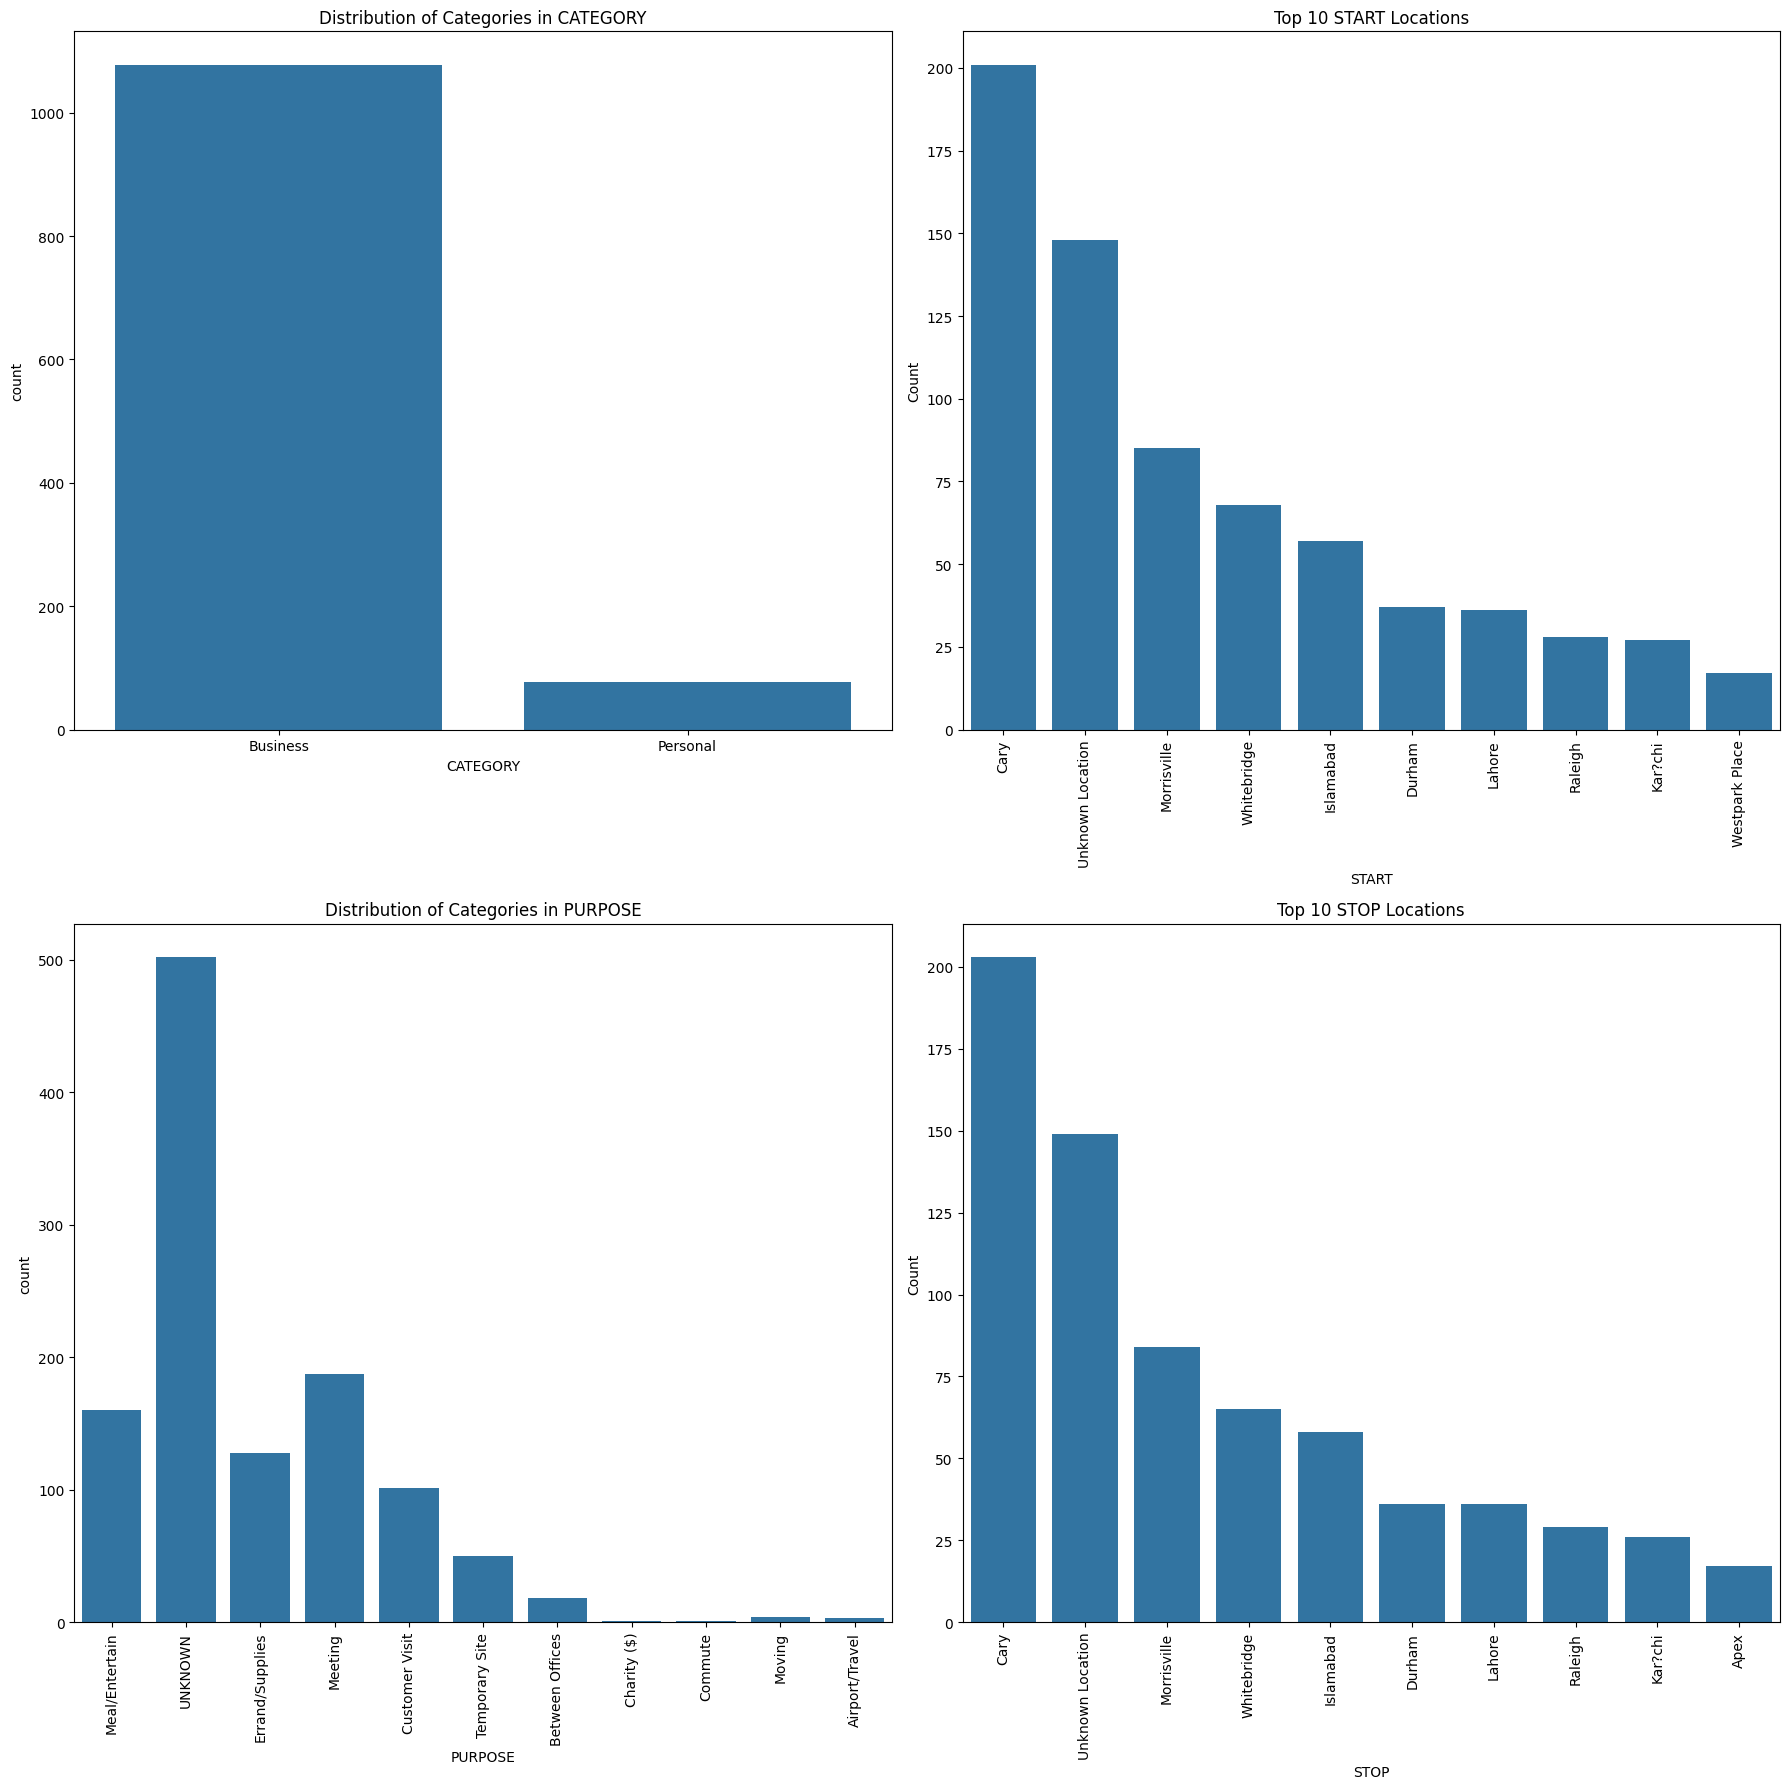

In [30]:

# Convert 'CATEGORY' column to categorical data type
df['CATEGORY'] = df['CATEGORY'].astype('category')

fig, axes = plt.subplots(2, 2, figsize=(18, 18))

# Distribution of Categories in CATEGORY
sns.countplot(data=df, x='CATEGORY', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Categories in CATEGORY')

# Distribution of Categories in PURPOSE
sns.countplot(data=df, x='PURPOSE', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Categories in PURPOSE')
axes[1, 0].tick_params(axis='x', rotation=90)

# Top 10 locations for START
temp_start = df['START'].value_counts().nlargest(10).reset_index()
temp_start.columns = ['START', 'Count']  # Rename columns
sns.barplot(data=temp_start, x='START', y='Count', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 START Locations')
axes[0, 1].tick_params(axis='x', rotation=90)

# Top 10 locations for STOP
temp_stop = df['STOP'].value_counts().nlargest(10).reset_index()
temp_stop.columns = ['STOP', 'Count']  # Rename columns
sns.barplot(data=temp_stop, x='STOP', y='Count', ax=axes[1, 1])
axes[1, 1].set_title('Top 10 STOP Locations')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


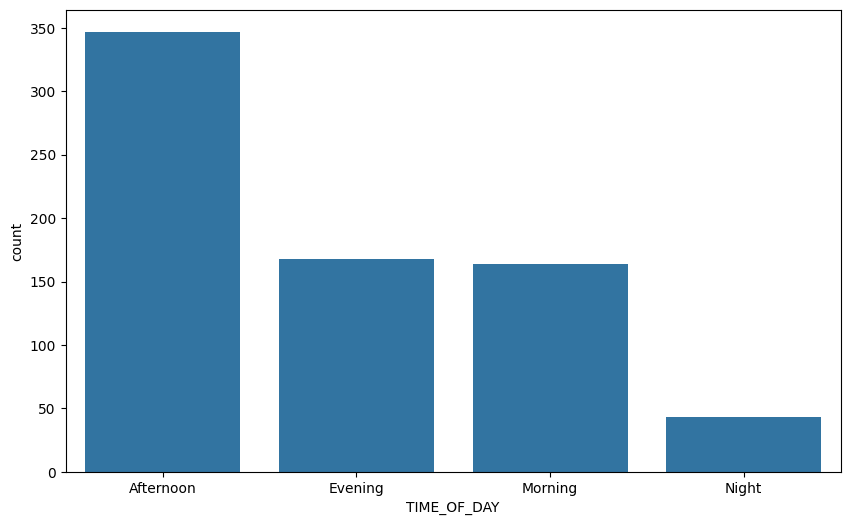

In [31]:


# Convert 'TIME_OF_DAY' column to categorical data type
df['TIME_OF_DAY'] = df['TIME_OF_DAY'].astype('category')

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TIME_OF_DAY')
plt.show()



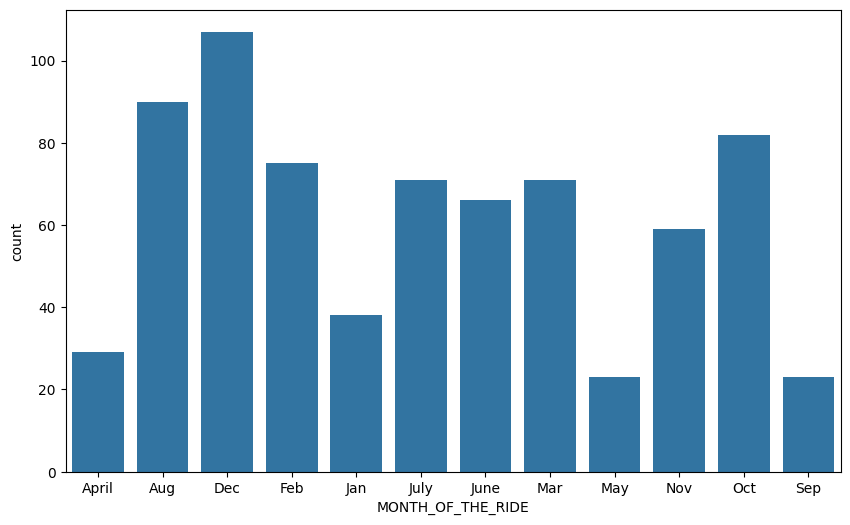

In [32]:


# Convert 'MONTH_OF_THE_RIDE' column to categorical data type
df['MONTH_OF_THE_RIDE'] = df['MONTH_OF_THE_RIDE'].astype('category')

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MONTH_OF_THE_RIDE')
plt.show()



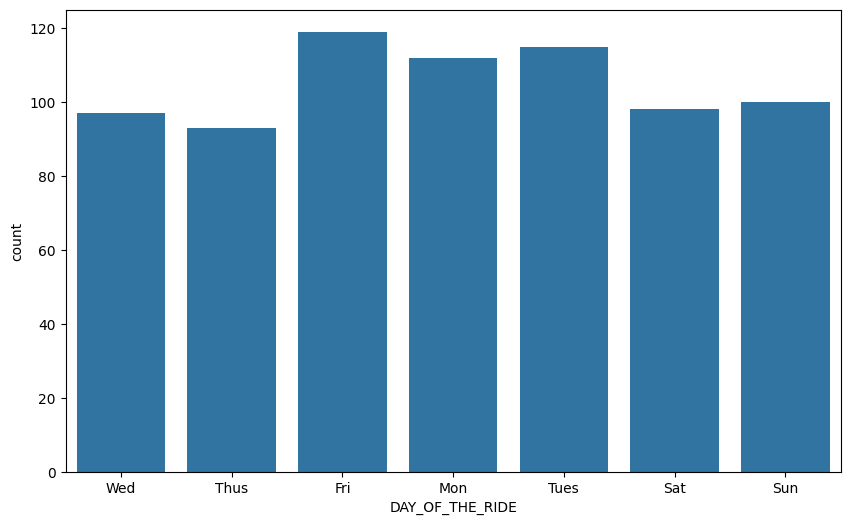

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DAY_OF_THE_RIDE')
plt.show()



In [34]:
print(df)

              START_DATE            END_DATE  CATEGORY             START  \
0                    NaT                 NaT  Business       Fort Pierce   
1                    NaT                 NaT  Business       Fort Pierce   
2                    NaT                 NaT  Business       Fort Pierce   
3                    NaT                 NaT  Business       Fort Pierce   
4                    NaT                 NaT  Business       Fort Pierce   
...                  ...                 ...       ...               ...   
1150 2016-12-31 01:07:00 2016-12-31 01:14:00  Business           Kar?chi   
1151 2016-12-31 13:24:00 2016-12-31 13:42:00  Business           Kar?chi   
1152 2016-12-31 15:03:00 2016-12-31 15:38:00  Business  Unknown Location   
1153 2016-12-31 21:32:00 2016-12-31 21:50:00  Business        Katunayake   
1154 2016-12-31 22:08:00 2016-12-31 23:51:00  Business           Gampaha   

                  STOP  MILES          PURPOSE TIME_OF_DAY MONTH_OF_THE_RIDE  \
0      

C:\Users\rmnjs\AppData\Local\Temp\ipykernel_23104\184125292.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = df.groupby('MONTH_OF_THE_RIDE')['DURATION_OF_THE_RIDE'].mean().reset_index()


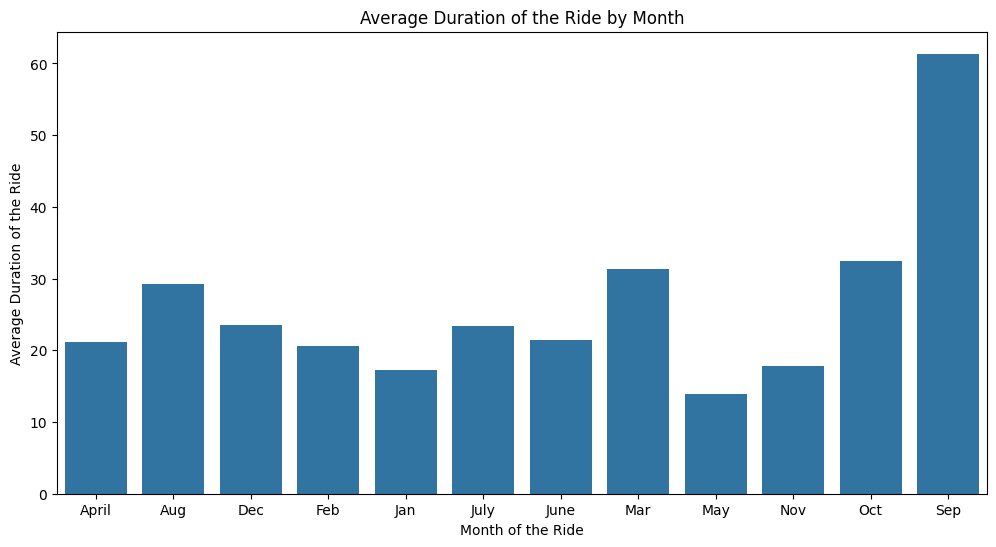

In [35]:


# Assuming 'df' is your DataFrame

# Group by 'MONTH_OF_THE_RIDE' and calculate the mean of 'DURATION_OF_THE_RIDE'
temp = df.groupby('MONTH_OF_THE_RIDE')['DURATION_OF_THE_RIDE'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='MONTH_OF_THE_RIDE', y='DURATION_OF_THE_RIDE', data=temp)
plt.xlabel('Month of the Ride')
plt.ylabel('Average Duration of the Ride')
plt.title('Average Duration of the Ride by Month')
plt.show()


In [36]:
df.to_csv('cleaning_uder_data')

<center> <h1 style="color:white; background-color:black; font-size:50px;" >Thank You</h1> </center>